In [2]:
import numpy as np
import pandas as pd
import missingno as msno
data_train = pd.read_csv('claim_data_v2_train.csv')
data_train.sample(3)

,State_Code,State,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,...,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
637,IA,Iowa,267.686791,High School or Below,12/01/2018,Employed,F,54480,Suburban,Married,...,19,91,Hail,Branch,Four-Door Car,Compact,Ford,25835.0,N,1638
3762,KS,Kansas,493.518999,High School or Below,12/15/2018,Employed,M,29560,Suburban,Married,...,21,89,Collision,Agent,Four-Door Car,Midsize,Chevrolet,23930.0,N,4763
4868,NE,Nebraska,927.747290,Bachelor,01/15/2019,Employed,M,97729,Rural,Married,...,4,48,Scratch/Dent,Branch,Four-Door Car,Luxury,Chevrolet,35267.0,N,5869


In [3]:
def visualize_cat(attr, df=data_train):
    df_i = df[['Fraudulent_Claim', attr]].groupby([attr])['Fraudulent_Claim'].agg(['count','sum', 'mean'])
    m = 'Pct Fraud'
    df_i = df_i.rename({'count': 'frequency', 'sum': 'Fraud', 'mean': m}, axis='columns')
    print(df_i)
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    df_i['frequency'].plot.bar(ax=ax1, alpha=.8)
    df_i[m].plot.line(ax=ax2, color='k')
    ax1.set_ylabel('frequency')
    ax2.set_ylabel('Pct Fraud')
    ax2.set_ylim(bottom=0, top=1, auto=False)
    ax2.legend()

In [4]:
data_train["Fraudulent_Claim"].describe()

count     5001
unique       2
top          N
freq      4694
Name: Fraudulent_Claim, dtype: object

In [5]:
#Convert Fraud Claim data from Y/N to 1/0 for analysis purposes
data_train.Fraudulent_Claim.replace(('Y', 'N'), (1, 0), inplace=True)

In [6]:
#Test to see if fraud claim data converted correctly 
data_train.head(5)

,State_Code,State,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,...,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
0,KS,Kansas,575.560000,Bachelor,12/01/2018,Employed,F,56274,Suburban,Married,...,32,5,Collision,Agent,Two-Door Car,Midsize,Toyota,25781.0,0,1001
1,NE,Nebraska,697.953590,Bachelor,12/01/2018,Unemployed,F,0,NaN,Single,...,13,42,Scratch/Dent,Agent,Four-Door Car,Midsize,Chevrolet,37061.0,0,1002
2,OK,Oklahoma,1288.743165,Bachelor,12/01/2018,Employed,F,48767,Suburban,Married,...,18,38,Collision,Agent,Two-Door Car,Midsize,Chevrolet,17236.0,0,1003
3,MO,Missouri,764.586183,Bachelor,12/01/2018,Unemployed,M,0,Suburban,Married,...,18,65,Collision,Call Center,SUV,Midsize,Honda,30270.0,0,1004
4,KS,Kansas,281.369258,Bachelor,12/01/2018,Employed,M,43836,Rural,Single,...,52,44,Collision,Agent,Four-Door Car,Midsize,Ford,16263.0,0,1005


In [7]:
data_train.columns

Index(['State_Code', 'State', 'Claim_Amount', 'Education', 'Claim_Date',
       'Employment_Status', 'Gender', 'Income', 'Location', 'Marital_Status',
       'Monthly_Premium', 'Annual_Premium', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Claim_Cause', 'Claim_Report_Type',
       'Vehicle_Class', 'Vehicle_Size', 'Vehicle_Model', 'Outstanding_Balance',
       'Fraudulent_Claim', 'Claimant__Number'],
      dtype='object')

In [8]:
data_train.describe(include='all')

,State_Code,State,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,...,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
count,5001,5001,5001.000000,4990,5001,5001,5001,5.001000e+03,4998,5001,...,5001.000000,5001.000000,5001,5001,5001,5001,5001,4992.000000,5001.000000,5001.000000
unique,5,5,NaN,5,3,5,2,NaN,3,3,...,NaN,NaN,5,4,6,3,4,NaN,NaN,NaN
top,IA,Iowa,NaN,College,12/01/2018,Employed,M,NaN,Suburban,Married,...,NaN,NaN,Collision,Agent,Four-Door Car,Midsize,Toyota,NaN,NaN,NaN
freq,1546,1546,NaN,1492,2000,3126,2531,NaN,3156,2930,...,NaN,NaN,2077,1889,2535,3523,1278,NaN,NaN,NaN
mean,NaN,NaN,787.763253,NaN,NaN,NaN,NaN,4.131045e+04,NaN,NaN,...,15.004199,48.234953,NaN,NaN,NaN,NaN,NaN,23728.152644,0.061388,3501.000000
std,NaN,NaN,655.963269,NaN,NaN,NaN,NaN,2.276904e+05,NaN,NaN,...,11.139649,28.096651,NaN,NaN,NaN,NaN,NaN,13827.401917,0.240064,1443.808678
min,NaN,NaN,189.868369,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,1001.000000
25%,NaN,NaN,402.296353,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,...,5.000000,24.000000,NaN,NaN,NaN,NaN,NaN,11528.750000,0.000000,2251.000000
50%,NaN,NaN,577.390039,NaN,NaN,NaN,NaN,3.464000e+04,NaN,NaN,...,13.000000,48.000000,NaN,NaN,NaN,NaN,NaN,23993.500000,0.000000,3501.000000
75%,NaN,NaN,886.114954,NaN,NaN,NaN,NaN,6.300900e+04,NaN,NaN,...,23.000000,72.000000,NaN,NaN,NaN,NaN,NaN,35574.000000,0.000000,4751.000000


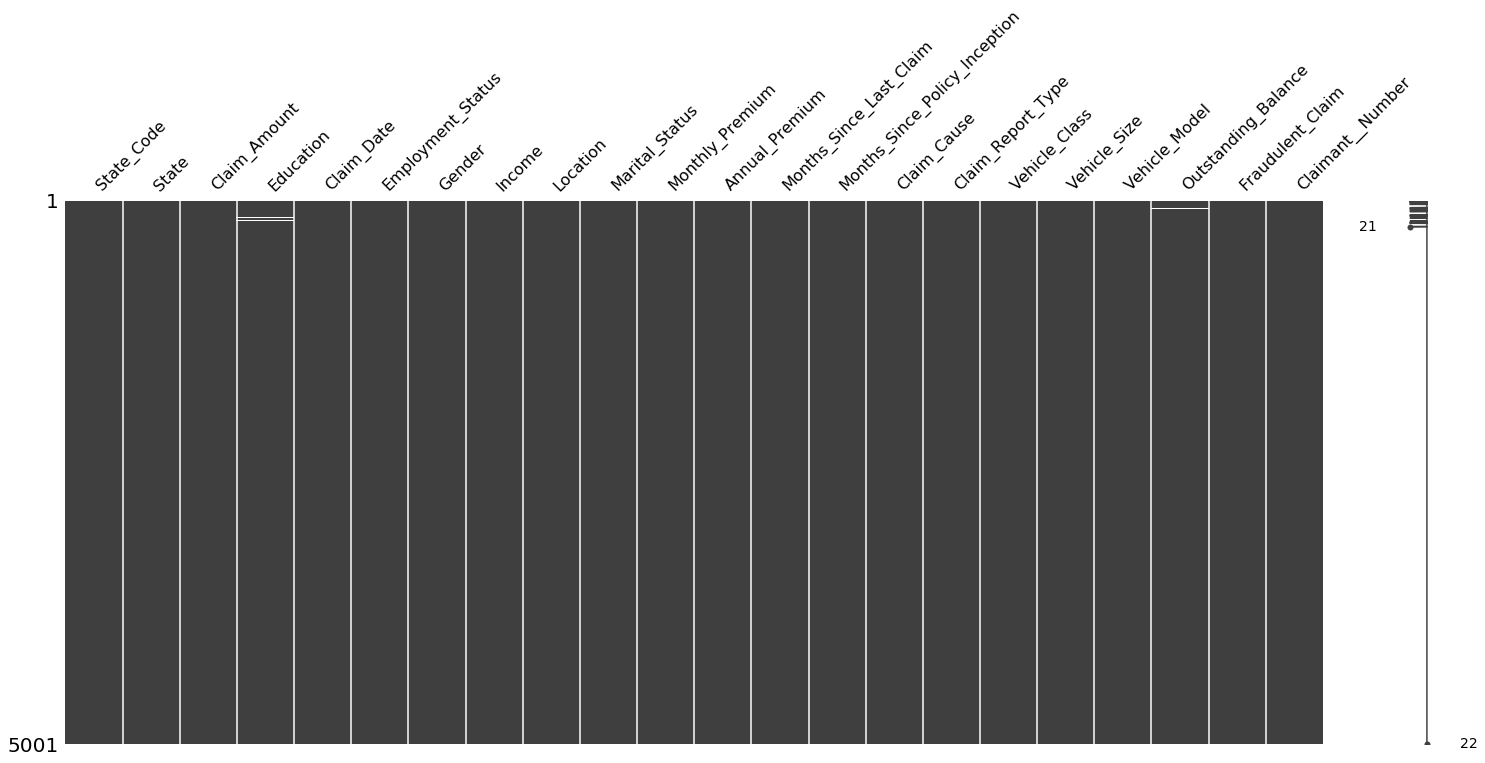

In [9]:
# missing data
msno.matrix(data_train)

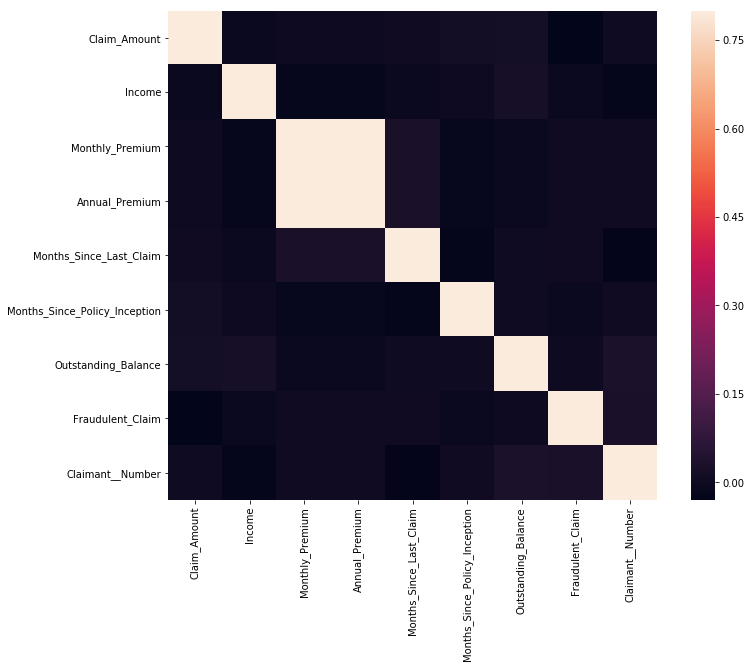

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat= data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

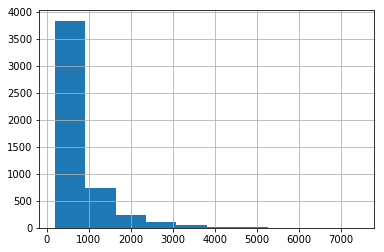

In [11]:
#potential log tranformation
data_train['Claim_Amount'].hist()

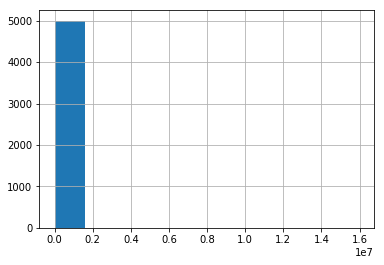

In [12]:
data_train['Income'].describe()
data_train['Income'].hist()

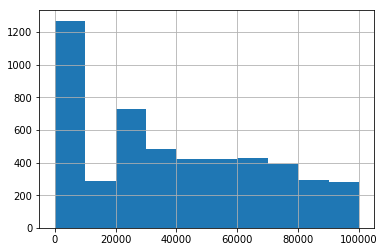

In [13]:
data=data_train['Income'].where(data_train['Income']<=100000,other=100001)
data.hist()

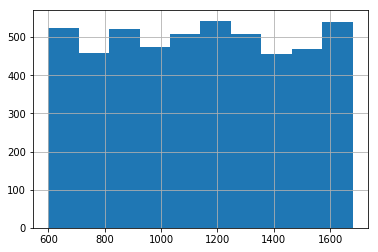

In [14]:
data_train['Annual_Premium'].hist()

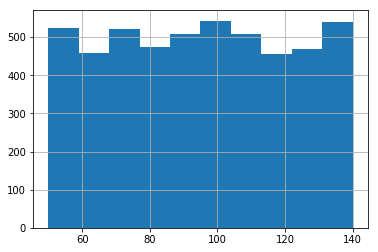

In [15]:
data_train['Monthly_Premium'].hist()

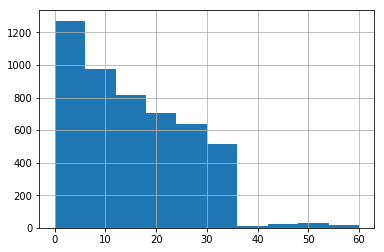

In [16]:
data_train['Months_Since_Last_Claim'].hist()

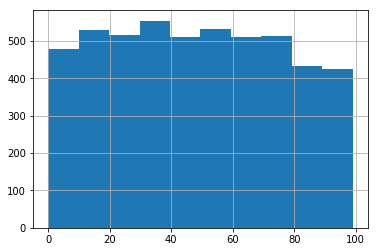

In [17]:
data_train['Months_Since_Policy_Inception'].hist()

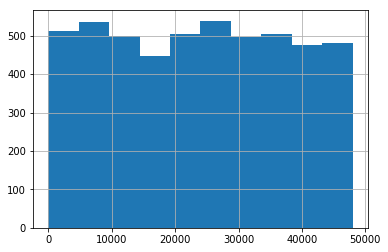

In [18]:
data_train['Outstanding_Balance'].hist()

In [19]:
#missing data
data_train.isna().sum()

State_Code                        0
State                             0
Claim_Amount                      0
Education                        11
Claim_Date                        0
Employment_Status                 0
Gender                            0
Income                            0
Location                          3
Marital_Status                    0
Monthly_Premium                   0
Annual_Premium                    0
Months_Since_Last_Claim           0
Months_Since_Policy_Inception     0
Claim_Cause                       0
Claim_Report_Type                 0
Vehicle_Class                     0
Vehicle_Size                      0
Vehicle_Model                     0
Outstanding_Balance               9
Fraudulent_Claim                  0
Claimant__Number                  0
dtype: int64

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


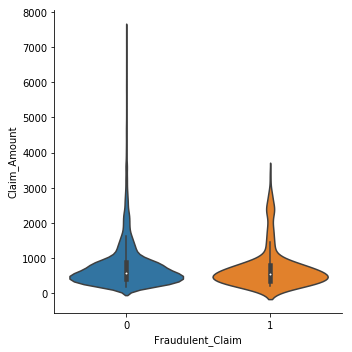

In [20]:
sns.catplot(x="Fraudulent_Claim", y="Claim_Amount", kind="violin",data=data_train);

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


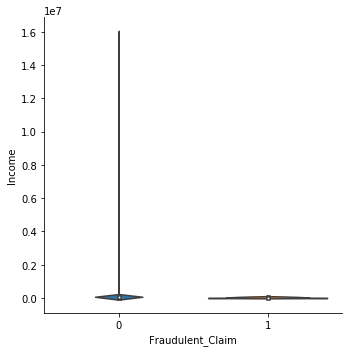

In [21]:
sns.catplot(x="Fraudulent_Claim", y="Income", kind="violin",data=data_train);

          frequency  Fraud  Pct Fraud
Income                               
0              1269     99   0.078014
10074             1      0   0.000000
10105             1      0   0.000000
10237             1      1   1.000000
10269             1      0   0.000000
10275             1      0   0.000000
10312             4      1   0.250000
10334             1      0   0.000000
10337             1      0   0.000000
10384             1      0   0.000000
10475             1      0   0.000000
10511             1      0   0.000000
10563             1      0   0.000000
10621             4      0   0.000000
10629             1      0   0.000000
10710             1      0   0.000000
10743             1      0   0.000000
10853             1      0   0.000000
10892             1      0   0.000000
11167             1      0   0.000000
11343             1      0   0.000000
11417             1      0   0.000000
11432             2      0   0.000000
11489             1      0   0.000000
11612       

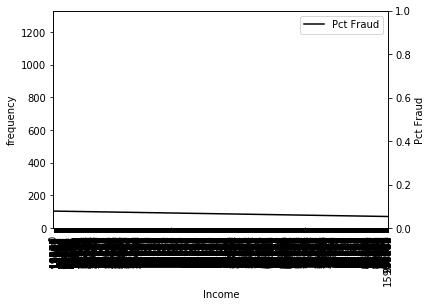

In [22]:
visualize_cat('Income')

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


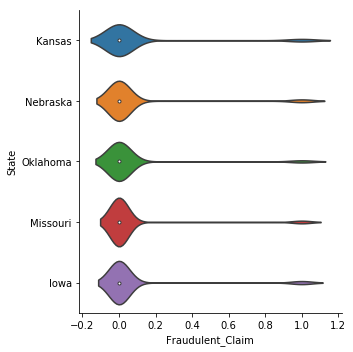

In [23]:
sns.catplot(x="Fraudulent_Claim", y="State", kind="violin",data=data_train);


In [24]:
data_train.Claim_Cause.unique()

array(['Collision', 'Scratch/Dent', 'Hail', 'Other', 'Fire'], dtype=object)

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


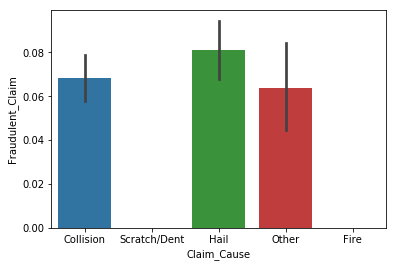

In [25]:
%matplotlib inline

sns.barplot(x="Claim_Cause", y="Fraudulent_Claim", data=data_train);

In [26]:
# Hail slightly higher mean than collision and other but scratch/dent is ZERO
claim_cause1=data_train.groupby('Claim_Cause', as_index=False).agg({"Fraudulent_Claim":["sum","mean","count"]})
print(claim_cause1)

    Claim_Cause Fraudulent_Claim                
                             sum      mean count
0     Collision              142  0.068368  2077
1          Fire                0  0.000000     1
2          Hail              128  0.081115  1578
3         Other               37  0.063793   580
4  Scratch/Dent                0  0.000000   765


In [27]:
data_train.groupby('State', as_index=False).agg({"Fraudulent_Claim":["sum","mean","count"]})

State Fraudulent_Claim                
                         sum      mean count
0      Iowa              102  0.065977  1546
1    Kansas               35  0.075269   465
2  Missouri               75  0.051867  1446
3  Nebraska               67  0.065558  1022
4  Oklahoma               28  0.053640   522

In [28]:
data_train.groupby('Education', as_index=False).agg({"Fraudulent_Claim":["sum","mean","count"]})

Education Fraudulent_Claim                
                                     sum      mean count
0              Bachelor               91  0.061033  1491
1               College               88  0.058981  1492
2                Doctor               12  0.057971   207
3  High School or Below               87  0.061922  1405
4                Master               29  0.073418   395

In [29]:
#males have much higher fraud claim mean
data_train.groupby('Gender', as_index=False).agg({"Fraudulent_Claim":["sum","mean","count"]})

Gender Fraudulent_Claim                
                      sum      mean count
0      F               62  0.025101  2470
1      M              245  0.096800  2531

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


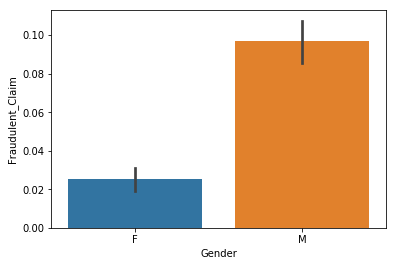

In [30]:
%matplotlib inline

sns.barplot(x="Gender", y="Fraudulent_Claim", data=data_train);

In [31]:
# Four-Door and Two-Door Cars much higher means but also much higher counts
data_train.groupby('Vehicle_Class', as_index=False).agg({"Fraudulent_Claim":["sum","mean","count"]})

Vehicle_Class Fraudulent_Claim                
                              sum      mean count
0  Four-Door Car              212  0.083629  2535
1     Luxury Car                2  0.025641    78
2     Luxury SUV                3  0.026087   115
3            SUV                3  0.003036   988
4     Sports Car                0  0.000000   256
5   Two-Door Car               87  0.084548  1029

In [32]:
data_train.groupby('Vehicle_Size', as_index=False).agg({"Fraudulent_Claim":["sum","mean","count"]})

Vehicle_Size Fraudulent_Claim                
                            sum      mean count
0      Compact               50  0.051813   965
1       Luxury               32  0.062378   513
2      Midsize              225  0.063866  3523

In [33]:
data_train.groupby('Vehicle_Model', as_index=False).agg({"Fraudulent_Claim":["sum","mean","count"]})

Vehicle_Model Fraudulent_Claim                
                             sum      mean count
0     Chevrolet               77  0.060773  1267
1          Ford               77  0.060870  1265
2         Honda               78  0.065491  1191
3        Toyota               75  0.058685  1278

In [34]:
# Unemployed showing highest fraud claim
data_train.groupby('Employment_Status', as_index=False).agg({"Fraudulent_Claim":["sum","mean","count"]})

Employment_Status Fraudulent_Claim                
                                 sum      mean count
0          Disabled               12  0.056338   213
1          Employed              174  0.055662  3126
2     Medical Leave               15  0.064103   234
3           Retired                7  0.044304   158
4        Unemployed               99  0.077953  1270

In [35]:
#Single tends to show a higher mean of fraud claims
data_train.groupby('Marital_Status', as_index=False).agg({"Fraudulent_Claim":["sum","mean","count"]})

Marital_Status Fraudulent_Claim                
                              sum      mean count
0       Divorced               37  0.049333   750
1        Married              156  0.053242  2930
2         Single              114  0.086298  1321

In [36]:
data_train.groupby('Location', as_index=False).agg({"Fraudulent_Claim":["sum","mean","count"]})

Location Fraudulent_Claim                
                         sum      mean count
0     Rural               47  0.047910   981
1  Suburban              201  0.063688  3156
2     Urban               59  0.068525   861

In [38]:
no_frauds = len(data_train[data_train['Fraudulent_Claim'] == 1])

In [40]:
non_fraud_indices = data_train[data_train.Fraudulent_Claim == 0].index

In [41]:
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)

In [42]:
fraud_indices = data_train[data_train.Fraudulent_Claim == 1].index

In [43]:
under_sample_indices = np.concatenate([fraud_indices,random_indices])

In [44]:
under_sample = data_train.loc[under_sample_indices]

In [46]:
under_sample["Fraudulent_Claim"].describe()

count    614.000000
mean       0.500000
std        0.500408
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: Fraudulent_Claim, dtype: float64